In [1]:
# things to do/doubts/discussions
# model sometimes give constant loss over epochs and gives poor results on prediction
# is the loss value supposed to reduce continously
# should we do augmentation of validation data ?
# All values are already between -1 to +1. should we do scaling on top of this ?
# if we are adding scaling of data, how to ensure that when it is being tested would give out rescaled data


# how to save subclassing api
# hyperparameter tuning
# how to save the best model among all the epochs
# should we shuffle repeat, prefetch etc ?
# incase of early stopping - what metric is to be monitored - val loss or val mse ?

#observations
#load model works without regularizer and initializer being passed  as arguments during forward pass

from utility import *

# GPUs Available:  1


In [2]:
#load the data
data_size = 1000
X_train, Y_train, X_validation, Y_validation, X_test = load_data(data_size)

# defining the parameters

# loss
# Mean Squared Error
# Root Mean Squared Error
# Mean Absolute Error
# https://www.tensorflow.org/api_docs/python/tf/keras/losses
batch_size = 32
epochs = 100
# steps_per_epoch = sum(train_occurences) / batch_size
starter_learning_rate = 1e-1
end_learning_rate = 1e-8
decay_steps = epochs * 3
# loss = tf.keras.losses.MeanAbsoluteError()
# loss = tf.keras.losses.MeanSquaredError()
loss = 'mean_squared_error'
metrics = tf.keras.metrics.MeanSquaredError()
scheduler = tf.keras.optimizers.schedules.PolynomialDecay(initial_learning_rate= starter_learning_rate,
    decay_steps= decay_steps,
    end_learning_rate= end_learning_rate,
    power=1)
# scheduler = 0.01
# optimizer=tf.keras.optimizers.Adam(learning_rate=scheduler)
kernel_regularizer=tf.keras.regularizers.L1L2(0.01)
callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mean_squared_error',patience=20)]
initializer=tf.keras.initializers.HeUniform()

verbose=2

# generating augmented data
X_train_Aug, Y_train_Aug = data_augmentation(X_train, Y_train)

1000 rowed data loaded


In [3]:
class Hidden_layer(layers.Layer):
    def __init__(self,units, **kwargs):
        super(Hidden_layer, self).__init__(**kwargs)
        self.units = units

    def build(self, input_shape):
        self.W = self.add_weight(name = 'w',shape=(input_shape[-1],self.units), initializer=tf.keras.initializers.HeUniform(),
                                 trainable=True, regularizer=tf.keras.regularizers.L1L2(0.01))

    def call(self, inputs):
        x = tf.nn.relu(tf.matmul(inputs, self.W))
        return x
    def get_config(self):
        config = super(Hidden_layer, self).get_config()
        config.update({"units": self.units})
        # config.update({"initializer": initializer})
        # config.update({"kernel_regularizer": kernel_regularizer})
        return config
        # return {"units": self.units, "kernel_regularizer": kernel_regularizer, "initializer": initializer}
    # @classmethod
    # def from_config(cls, config):
    #     return cls(**config)
        
class Output_layer(layers.Layer):
    def __init__(self, units, **kwargs):
        super(Output_layer, self).__init__(**kwargs)
        self.units = units

    def build(self, input_shape):
        self.W = self.add_weight(name = 'w',shape=(input_shape[-1],self.units), initializer=tf.keras.initializers.HeUniform(),
                                 trainable=True, regularizer=tf.keras.regularizers.L1L2(0.01))

    def call(self, inputs):
        x = tf.matmul(inputs, self.W)
        return x
    def get_config(self):
        config = super(Output_layer, self).get_config()
        config.update({"units": self.units})
        # config.update({"initializer": initializer})
        # config.update({"kernel_regularizer": kernel_regularizer})
        return config
        # return {"units": self.units, "kernel_regularizer": kernel_regularizer, "initializer": initializer}
    # @classmethod
    # def from_config(cls, config):
    #     return cls(**config)

# class MyReLU(layers.Layer):
#     def __init__(self):
#         super(MyReLU, self).__init__()

#     def call(self, x):
#         return tf.math.maximum(x, 0)

In [4]:
# NN Model 
class NNmodel():
    def model():
        model = tf.keras.models.Sequential()
        model.add(Hidden_layer(4))
        model.add(Output_layer(2))
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=scheduler),
                    loss = [tf.keras.losses.MeanAbsoluteError()],
                    metrics = tf.keras.metrics.MeanSquaredError()
        )
        return model

Epoch 1/100
32/32 - 1s - loss: 0.4623 - mean_squared_error: 0.1927 - val_loss: 0.3112 - val_mean_squared_error: 0.0436 - 1s/epoch - 45ms/step
Epoch 2/100
32/32 - 0s - loss: 0.2715 - mean_squared_error: 0.0239 - val_loss: 0.2966 - val_mean_squared_error: 0.0303 - 111ms/epoch - 3ms/step
Epoch 3/100
32/32 - 0s - loss: 0.2589 - mean_squared_error: 0.0189 - val_loss: 0.2940 - val_mean_squared_error: 0.0299 - 136ms/epoch - 4ms/step
Epoch 4/100
32/32 - 0s - loss: 0.2612 - mean_squared_error: 0.0206 - val_loss: 0.2600 - val_mean_squared_error: 0.0192 - 109ms/epoch - 3ms/step
Epoch 5/100
32/32 - 0s - loss: 0.2570 - mean_squared_error: 0.0189 - val_loss: 0.2652 - val_mean_squared_error: 0.0206 - 106ms/epoch - 3ms/step
Epoch 6/100
32/32 - 0s - loss: 0.2480 - mean_squared_error: 0.0163 - val_loss: 0.2806 - val_mean_squared_error: 0.0253 - 112ms/epoch - 4ms/step
Epoch 7/100
32/32 - 0s - loss: 0.2484 - mean_squared_error: 0.0170 - val_loss: 0.2679 - val_mean_squared_error: 0.0215 - 103ms/epoch - 3ms

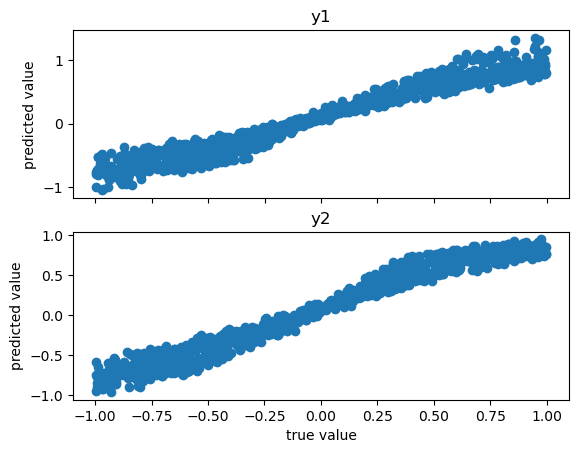

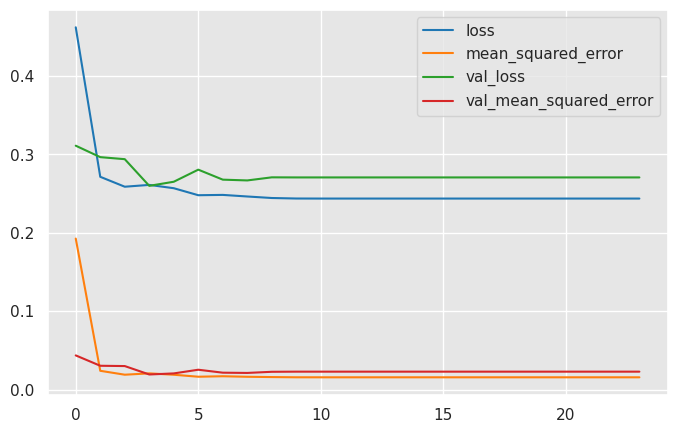

1/1 [==============================] - 0s 14ms/step
[[ 0.11840634  0.08815323]
 [-0.25349538  0.47878644]
 [-0.25762498 -0.28322371]
 [ 0.49030805 -0.30247998]
 [ 0.49443765  0.45953017]
 [-0.43944623  0.67410304]
 [ 0.67020232 -0.49426251]
 [-0.51383145  0.72095701]
 [ 0.67020232 -0.49426251]
 [-0.44564064 -0.46891219]]


In [5]:
# Model 1 - NN fitting with Normal data
model = NNmodel.model()
history = model.fit(X_train, Y_train, 
                    epochs=epochs, 
                    batch_size= batch_size, 
                    verbose=verbose, 
                    validation_data=(X_validation, Y_validation),
                    callbacks=callbacks,
                    # shuffle=True
                    )  
model_eval(model, history, X_validation, Y_validation, X_train, Y_train, batch_size, X_test)
model.save('NN_1000_normal.h5')

32/32 [==============================] - 0s 1ms/step
rmse of y1:  0.16299046160871772
rmse of y2:  0.13803939713794436
1/1 [==============================] - 0s 16ms/step
[[ 0.11840634  0.08815323]
 [-0.25349538  0.47878644]
 [-0.25762498 -0.28322371]
 [ 0.49030805 -0.30247998]
 [ 0.49443765  0.45953017]
 [-0.43944623  0.67410304]
 [ 0.67020232 -0.49426251]
 [-0.51383145  0.72095701]
 [ 0.67020232 -0.49426251]
 [-0.44564064 -0.46891219]]


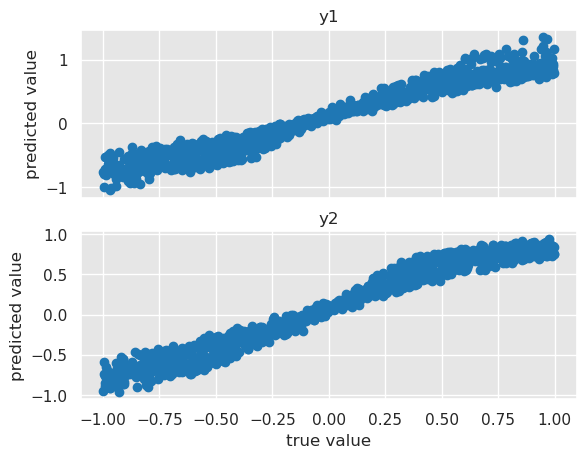

In [6]:
model.get_config()
# models = ['NN_1000_normal.h5','NN_1000_Aug.h5','ENN_1000_normal.h5','ENN_1000_Aug.h5', ]
# for model in models:
from keras.utils import CustomObjectScope

with CustomObjectScope({'Hidden_layer':Hidden_layer, 'Output_layer':Output_layer}):
       #soln 1
       # load_model = tf.keras.models.load_model('NN_1000_normal.h5', compile=False)
       load_model = tf.keras.models.load_model('NN_1000_normal.h5')
       
predictions = load_model.predict(X_validation)
prediction_accuracy(predictions, Y_validation)
evaluate_train = load_model.evaluate(X_train, Y_train, batch_size=batch_size)

# evaluate_train = model.evaluate(X_train, Y_train, batch_size=batch_size)
evaluate_validation = load_model.evaluate(X_validation,Y_validation, batch_size=batch_size)

y_pred = load_model.predict(X_test)
print(y_pred)

Epoch 1/100
250/250 - 1s - loss: 0.3097 - mean_squared_error: 0.0526 - val_loss: 0.2466 - val_mean_squared_error: 0.0184 - 692ms/epoch - 3ms/step
Epoch 2/100
250/250 - 0s - loss: 0.2685 - mean_squared_error: 0.0271 - val_loss: 0.2413 - val_mean_squared_error: 0.0176 - 415ms/epoch - 2ms/step
Epoch 3/100
250/250 - 0s - loss: 0.2682 - mean_squared_error: 0.0270 - val_loss: 0.2413 - val_mean_squared_error: 0.0176 - 482ms/epoch - 2ms/step
Epoch 4/100
250/250 - 0s - loss: 0.2682 - mean_squared_error: 0.0270 - val_loss: 0.2413 - val_mean_squared_error: 0.0176 - 404ms/epoch - 2ms/step
Epoch 5/100
250/250 - 0s - loss: 0.2682 - mean_squared_error: 0.0270 - val_loss: 0.2413 - val_mean_squared_error: 0.0176 - 423ms/epoch - 2ms/step
Epoch 6/100
250/250 - 0s - loss: 0.2682 - mean_squared_error: 0.0270 - val_loss: 0.2413 - val_mean_squared_error: 0.0176 - 385ms/epoch - 2ms/step
Epoch 7/100
250/250 - 0s - loss: 0.2682 - mean_squared_error: 0.0270 - val_loss: 0.2413 - val_mean_squared_error: 0.0176 - 3

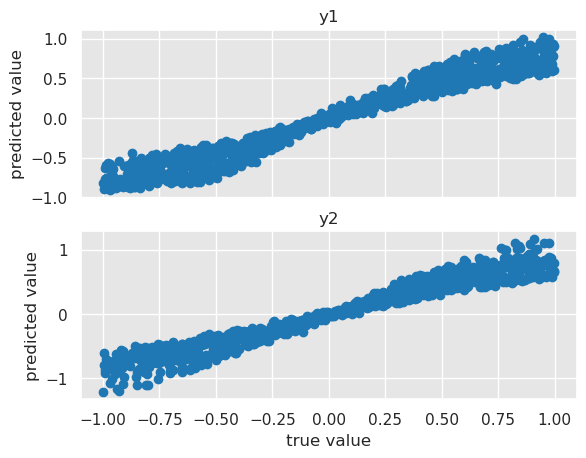

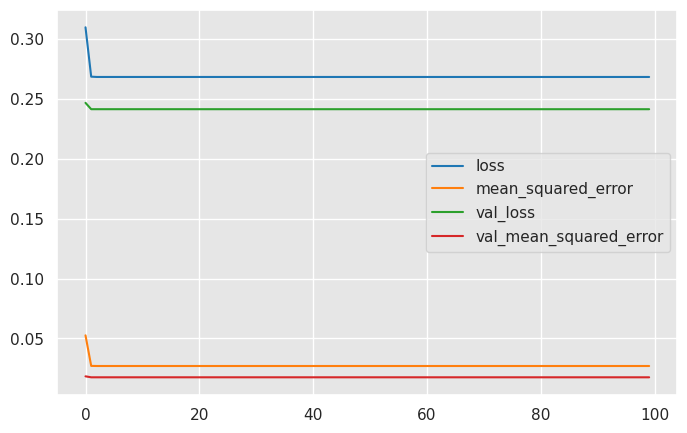

1/1 [==============================] - 0s 16ms/step
[[-0.00193809 -0.01113479]
 [-0.34420292  0.33071291]
 [-0.34237672 -0.35214371]
 [ 0.34032674 -0.3529825 ]
 [ 0.33850053  0.32987412]
 [-0.51533534  0.50163676]
 [ 0.51145915 -0.52390635]
 [-0.58378831  0.5700063 ]
 [ 0.51145915 -0.52390635]
 [-0.51259604 -0.52264816]]


In [15]:
# Model 2 - NN fitting with Augmented data

model = NNmodel.model()
history = model.fit(X_train_Aug, Y_train_Aug,
                    epochs=epochs, 
                    batch_size= batch_size, 
                    verbose=verbose, 
                    validation_data=(X_validation, Y_validation),
                    callbacks=callbacks,
                    # shuffle=True
                    )  
model_eval(model, history, X_validation, Y_validation, X_train_Aug, Y_train_Aug, batch_size, X_test)
model.save('NN_1000_Aug.h5')

32/32 [==============================] - 0s 1ms/step
rmse of y1:  0.13248181349739116
rmse of y2:  0.13245978091014785
1/1 [==============================] - 0s 16ms/step
[[-0.00193809 -0.01113479]
 [-0.34420292  0.33071291]
 [-0.34237672 -0.35214371]
 [ 0.34032674 -0.3529825 ]
 [ 0.33850053  0.32987412]
 [-0.51533534  0.50163676]
 [ 0.51145915 -0.52390635]
 [-0.58378831  0.5700063 ]
 [ 0.51145915 -0.52390635]
 [-0.51259604 -0.52264816]]


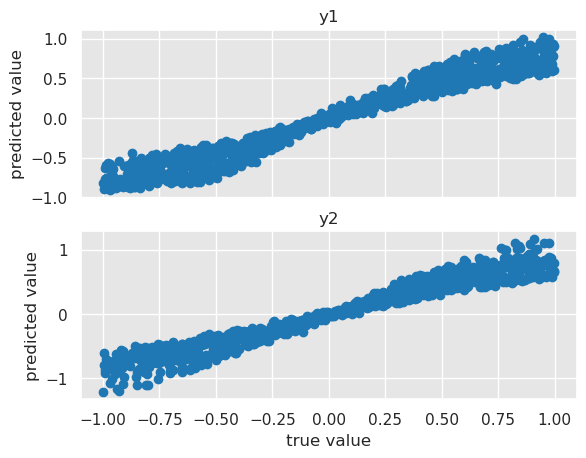

In [16]:
model.get_config()
# models = ['NN_1000_normal.h5','NN_1000_Aug.h5','ENN_1000_normal.h5','ENN_1000_Aug.h5', ]
# for model in models:
from keras.utils import CustomObjectScope

with CustomObjectScope({'Hidden_layer':Hidden_layer, 'Output_layer':Output_layer}):
       #soln 1
       # load_model = tf.keras.models.load_model('NN_1000_normal.h5', compile=False)
       load_model = tf.keras.models.load_model('NN_1000_Aug.h5')
       
predictions = load_model.predict(X_validation)
prediction_accuracy(predictions, Y_validation)
evaluate_train = load_model.evaluate(X_train_Aug, Y_train_Aug, batch_size=batch_size)

# evaluate_train = model.evaluate(X_train, Y_train, batch_size=batch_size)
evaluate_validation = load_model.evaluate(X_validation,Y_validation, batch_size=batch_size)

y_pred = load_model.predict(X_test)
print(y_pred)

In [9]:
class EqHidden_layer(layers.Layer):
    def __init__(self, units, **kwargs):
        super(EqHidden_layer, self).__init__(**kwargs)
        self.units = units

    def build(self, input_shape):
        self.a = self.add_weight(name = 'a',shape=(1,), initializer=tf.keras.initializers.HeUniform(),
                                 trainable=True, regularizer=tf.keras.regularizers.L1L2(0.01))
        self.b = self.add_weight(name = 'b',shape=(1,), initializer=tf.keras.initializers.HeUniform(),
                                 trainable=True, regularizer=tf.keras.regularizers.L1L2(0.01))
        self.c = self.add_weight(name = 'c',shape=(1,), initializer=tf.keras.initializers.HeUniform(),
                                 trainable=True, regularizer=tf.keras.regularizers.L1L2(0.01))
        self.a_matrix = tf.constant([[1,0,0,0], [0,1,0,0], [0,0,1,0],[0,0,0,1]], dtype=tf.float64)
        self.b_matrix = tf.constant([[0,1,0,1], [1,0,1,0], [0,1,0,1],[1,0,1,0]], dtype=tf.float64)
        self.c_matrix = tf.constant([[0,0,1,0], [0,0,0,1], [1,0,0,0],[0,1,0,0]], dtype=tf.float64)
    
    def call(self, inputs):
        self.W = tf.multiply(self.a, self.a_matrix) + tf.multiply(self.b, self.b_matrix) + tf.multiply(self.c, self.c_matrix)
        x = tf.nn.relu(tf.matmul(inputs, self.W))
        # tf.print(self.W)
        return x
    def get_config(self):
        config = super(EqHidden_layer, self).get_config()
        config.update({"units": self.units})
        # config.update({"initializer": initializer})
        # config.update({"kernel_regularizer": kernel_regularizer})
        return config
    # @classmethod
    # def from_config(cls, config):
    #     return cls(**config)

class EqOutput_layer(layers.Layer):
    def __init__(self,units, **kwargs):
        super(EqOutput_layer, self).__init__(**kwargs)
        self.units = units

    def build(self, input_shape):
        self.d = self.add_weight(name = 'd',shape=(1,), initializer=tf.keras.initializers.HeUniform(),
                                 trainable=True, regularizer=tf.keras.regularizers.L1L2(0.01))
        self.d_matrix = tf.constant([[1,-1], [-1,-1], [-1,1],[1,1]], dtype=tf.float64)

    def call(self, inputs):
        self.W = tf.multiply(self.d, self.d_matrix)
        x = tf.matmul(inputs, self.W)
        # tf.print(tf.transpose(self.W))
        return x
    def get_config(self):
        config = super(EqOutput_layer, self).get_config()
        config.update({"units": self.units})
        # config.update({"initializer": initializer})
        # config.update({"kernel_regularizer": kernel_regularizer})
        return config

    # @classmethod
    # def from_config(cls, config):
    #     return cls(**config)

In [10]:
# Equivariant NN Model
class EqNNmodel():
    def model():
        model = tf.keras.models.Sequential()
        model.add(EqHidden_layer(4))
        model.add(EqOutput_layer(2))

        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=scheduler),
                    loss = tf.keras.losses.MeanAbsoluteError(),
                    metrics = tf.keras.metrics.MeanSquaredError()
        )
        return model

Epoch 1/100
32/32 - 1s - loss: 0.5217 - mean_squared_error: 0.3264 - val_loss: 0.3091 - val_mean_squared_error: 0.1169 - 627ms/epoch - 20ms/step
Epoch 2/100
32/32 - 0s - loss: 0.1745 - mean_squared_error: 0.0311 - val_loss: 0.1169 - val_mean_squared_error: 0.0110 - 129ms/epoch - 4ms/step
Epoch 3/100
32/32 - 0s - loss: 0.1489 - mean_squared_error: 0.0206 - val_loss: 0.1074 - val_mean_squared_error: 0.0096 - 110ms/epoch - 3ms/step
Epoch 4/100
32/32 - 0s - loss: 0.1465 - mean_squared_error: 0.0204 - val_loss: 0.1077 - val_mean_squared_error: 0.0097 - 141ms/epoch - 4ms/step
Epoch 5/100
32/32 - 0s - loss: 0.1466 - mean_squared_error: 0.0200 - val_loss: 0.1087 - val_mean_squared_error: 0.0101 - 110ms/epoch - 3ms/step
Epoch 6/100
32/32 - 0s - loss: 0.1457 - mean_squared_error: 0.0197 - val_loss: 0.1110 - val_mean_squared_error: 0.0106 - 144ms/epoch - 5ms/step
Epoch 7/100
32/32 - 0s - loss: 0.1457 - mean_squared_error: 0.0201 - val_loss: 0.1084 - val_mean_squared_error: 0.0099 - 144ms/epoch - 

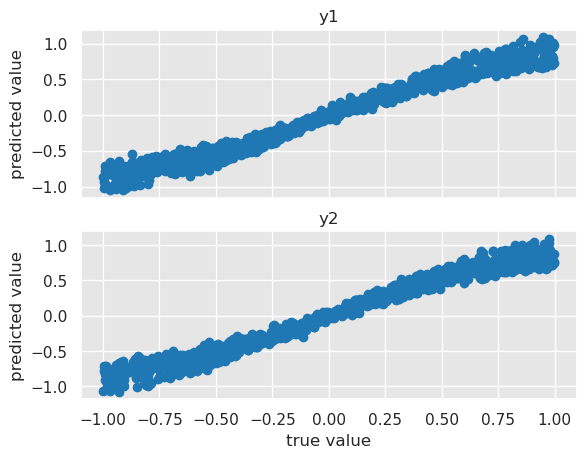

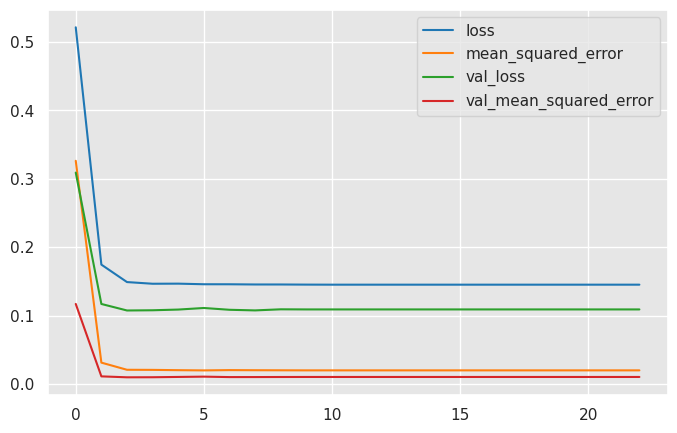

1/1 [==============================] - 0s 15ms/step
[[-5.55111512e-17 -1.11022302e-16]
 [-4.01309287e-01  4.01309287e-01]
 [-4.01309287e-01 -4.01309287e-01]
 [ 4.01309287e-01 -4.01309287e-01]
 [ 4.01309287e-01  4.01309287e-01]
 [-5.07500055e-01  5.07500055e-01]
 [ 5.07500055e-01 -5.07500055e-01]
 [-5.49976362e-01  5.49976362e-01]
 [ 5.07500055e-01 -5.07500055e-01]
 [-5.07500055e-01 -5.07500055e-01]]


In [11]:
# Model 3 Equivariant NN - on Normal data
Eqmodel = EqNNmodel.model()
history = Eqmodel.fit(X_train, Y_train,
                    epochs=epochs, 
                    batch_size= batch_size, 
                    verbose=verbose, 
                    validation_data=(X_validation, Y_validation),
                    callbacks=callbacks,
                    # shuffle=True
                    )  
model_eval(Eqmodel, history, X_validation, Y_validation, X_train, Y_train, batch_size, X_test)
Eqmodel.save('ENN_1000_normal.h5',
          overwrite=True)

32/32 [==============================] - 0s 1ms/step
rmse of y1:  0.1023946787367936
rmse of y2:  0.09836716912112181
1/1 [==============================] - 0s 15ms/step
[[-5.55111512e-17 -1.11022302e-16]
 [-4.01309287e-01  4.01309287e-01]
 [-4.01309287e-01 -4.01309287e-01]
 [ 4.01309287e-01 -4.01309287e-01]
 [ 4.01309287e-01  4.01309287e-01]
 [-5.07500055e-01  5.07500055e-01]
 [ 5.07500055e-01 -5.07500055e-01]
 [-5.49976362e-01  5.49976362e-01]
 [ 5.07500055e-01 -5.07500055e-01]
 [-5.07500055e-01 -5.07500055e-01]]


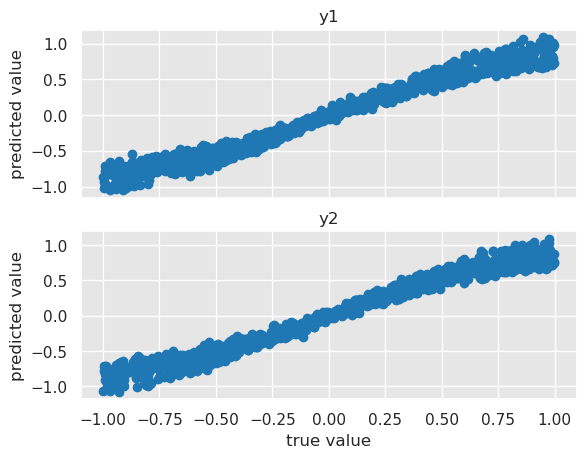

In [12]:
model.get_config()
# models = ['NN_1000_normal.h5','NN_1000_Aug.h5','ENN_1000_normal.h5','ENN_1000_Aug.h5', ]
# for model in models:
from keras.utils import CustomObjectScope

with CustomObjectScope({'EqHidden_layer':EqHidden_layer, 'EqOutput_layer':EqOutput_layer}):
       #soln 1
       # load_model = tf.keras.models.load_model('NN_1000_normal.h5', compile=False)
       load_model = tf.keras.models.load_model('ENN_1000_normal.h5')
       
predictions = load_model.predict(X_validation)
prediction_accuracy(predictions, Y_validation)
evaluate_train = load_model.evaluate(X_train, Y_train, batch_size=batch_size)

# evaluate_train = model.evaluate(X_train, Y_train, batch_size=batch_size)
evaluate_validation = load_model.evaluate(X_validation,Y_validation, batch_size=batch_size)

y_pred = load_model.predict(X_test)
print(y_pred)

Epoch 1/100
250/250 - 1s - loss: 0.1714 - mean_squared_error: 0.0346 - val_loss: 0.1358 - val_mean_squared_error: 0.0201 - 1s/epoch - 4ms/step
Epoch 2/100
250/250 - 0s - loss: 0.1600 - mean_squared_error: 0.0289 - val_loss: 0.1359 - val_mean_squared_error: 0.0200 - 464ms/epoch - 2ms/step
Epoch 3/100
250/250 - 0s - loss: 0.1600 - mean_squared_error: 0.0289 - val_loss: 0.1359 - val_mean_squared_error: 0.0200 - 466ms/epoch - 2ms/step
Epoch 4/100
250/250 - 0s - loss: 0.1600 - mean_squared_error: 0.0289 - val_loss: 0.1359 - val_mean_squared_error: 0.0200 - 452ms/epoch - 2ms/step
Epoch 5/100
250/250 - 0s - loss: 0.1600 - mean_squared_error: 0.0289 - val_loss: 0.1359 - val_mean_squared_error: 0.0200 - 481ms/epoch - 2ms/step
Epoch 6/100
250/250 - 0s - loss: 0.1600 - mean_squared_error: 0.0289 - val_loss: 0.1359 - val_mean_squared_error: 0.0200 - 452ms/epoch - 2ms/step
Epoch 7/100
250/250 - 0s - loss: 0.1600 - mean_squared_error: 0.0289 - val_loss: 0.1359 - val_mean_squared_error: 0.0200 - 445m

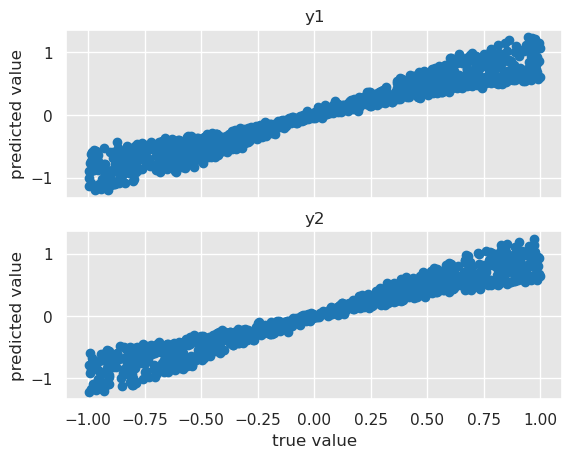

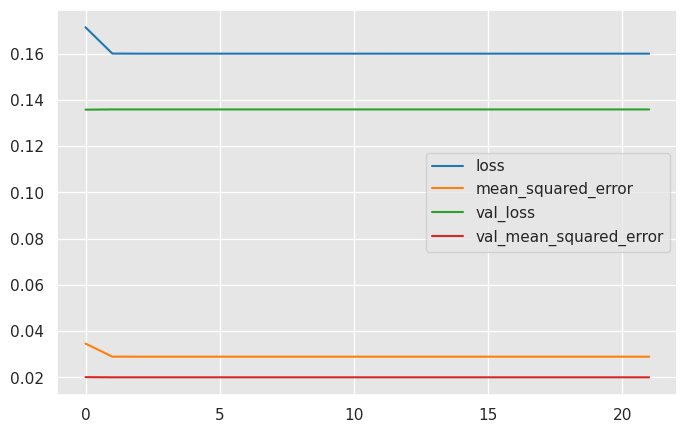

1/1 [==============================] - 0s 15ms/step
[[ 0.          0.        ]
 [-0.33635036  0.33635036]
 [-0.33635036 -0.33635036]
 [ 0.33635036 -0.33635036]
 [ 0.33635036  0.33635036]
 [-0.50452554  0.50452554]
 [ 0.50452554 -0.50452554]
 [-0.57179561  0.57179561]
 [ 0.50452554 -0.50452554]
 [-0.50452554 -0.50452554]]


In [13]:
# Model 4 Equivariant NN - on Augmented data
model = EqNNmodel.model()
history = model.fit(X_train_Aug, Y_train_Aug,
                    epochs=epochs, 
                    batch_size= batch_size, 
                    verbose=verbose, 
                    validation_data=(X_validation, Y_validation),
                    callbacks=callbacks,
                    # shuffle=True
                    )  
model_eval(model, history, X_validation, Y_validation, X_train_Aug, Y_train_Aug, batch_size, X_test)
model.save('ENN_1000_Aug.h5')

32/32 [==============================] - 0s 1ms/step
rmse of y1:  0.14392542183002868
rmse of y2:  0.13894263570928814
1/1 [==============================] - 0s 18ms/step
[[ 0.          0.        ]
 [-0.33635036  0.33635036]
 [-0.33635036 -0.33635036]
 [ 0.33635036 -0.33635036]
 [ 0.33635036  0.33635036]
 [-0.50452554  0.50452554]
 [ 0.50452554 -0.50452554]
 [-0.57179561  0.57179561]
 [ 0.50452554 -0.50452554]
 [-0.50452554 -0.50452554]]


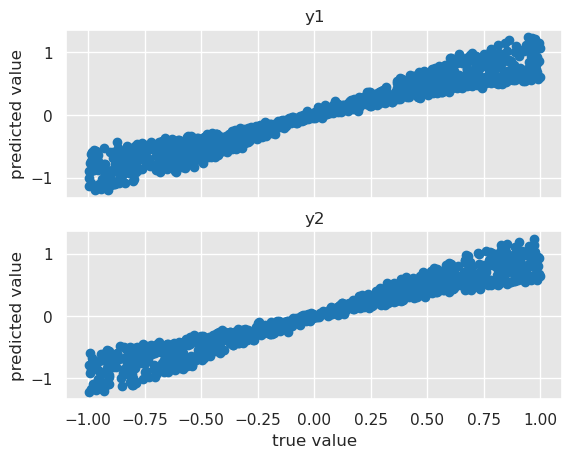

In [14]:
model.get_config()
# models = ['NN_1000_normal.h5','NN_1000_Aug.h5','ENN_1000_normal.h5','ENN_1000_Aug.h5', ]
# for model in models:
from keras.utils import CustomObjectScope

with CustomObjectScope({'EqHidden_layer':EqHidden_layer, 'EqOutput_layer':EqOutput_layer}):
       #soln 1
       # load_model = tf.keras.models.load_model('NN_1000_normal.h5', compile=False)
       load_model = tf.keras.models.load_model('ENN_1000_Aug.h5')
       
predictions = load_model.predict(X_validation)
prediction_accuracy(predictions, Y_validation)
evaluate_train = load_model.evaluate( X_train_Aug, Y_train_Aug, batch_size=batch_size)

# evaluate_train = model.evaluate(X_train, Y_train, batch_size=batch_size)
evaluate_validation = load_model.evaluate(X_validation,Y_validation, batch_size=batch_size)

y_pred = load_model.predict(X_test)
print(y_pred)